# Some statistical methods - example

With `pandas` is easy to compute statistical properties of data. More details can be seen here: http://pandas.pydata.org/pandas-docs/version/0.18.1/computation.html

In [1]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import data_api

dac = data_api.configure()

In [2]:
df = dac.get_data(channels=[
        'SINSB02-RIQM-DCP10:FOR-PHASE-AVG', 
        'SINDI01-RIQM-DCP10:FOR-PHASE-AVG', 
        'S10CB01-RIQM-DCP10:FOR-PHASE-AVG',
       ], 
                  start="2016-07-29 14:01", end="2016-07-29 14:12", 
                  index_field="date")


The `describe` method provides an overview of data:

In [3]:
df.describe()

/home/sala/Programs/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,SINSB02-RIQM-DCP10:FOR-PHASE-AVG,SINDI01-RIQM-DCP10:FOR-PHASE-AVG,S10CB01-RIQM-DCP10:FOR-PHASE-AVG
count,65981.000000,6.598100e+04,65980.000000
mean,-46.927967,3.148488e+02,145.944360
std,0.004632,9.100700e-11,0.025534
min,-46.947490,3.148487e+02,145.855480
25%,-46.931107,3.148487e+02,NaN
50%,-46.927998,3.148487e+02,NaN
75%,-46.924860,3.148487e+02,NaN
max,-46.908474,3.148487e+02,146.029070


You can plot and compute correlations:

<IPython.core.display.Javascript object>


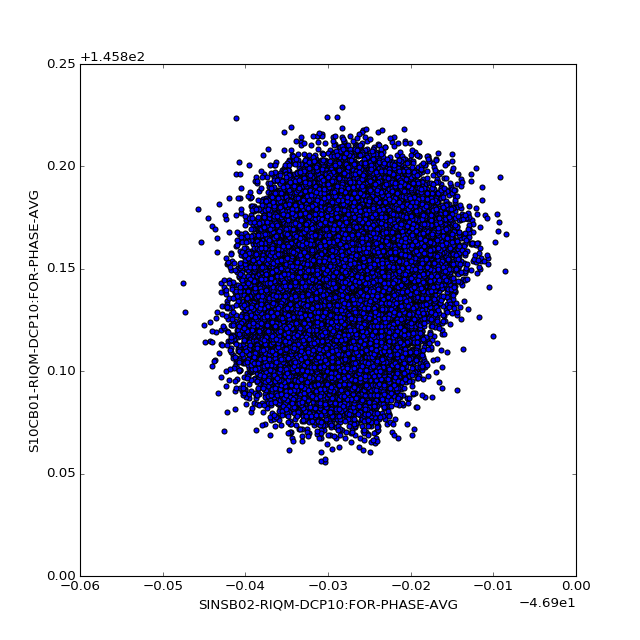

,SINSB02-RIQM-DCP10:FOR-PHASE-AVG,S10CB01-RIQM-DCP10:FOR-PHASE-AVG
SINSB02-RIQM-DCP10:FOR-PHASE-AVG,1.000000,0.242356
S10CB01-RIQM-DCP10:FOR-PHASE-AVG,0.242356,1.000000


In [8]:
# scatter plot
df.plot(kind='scatter', x=df.columns[0], y=df.columns[2], figsize=(8,8), style='.')

# correlation matrix
df[[df.columns[0], df.columns[2]]].corr()

You can also compute rolling averages etc:

<IPython.core.display.Javascript object>


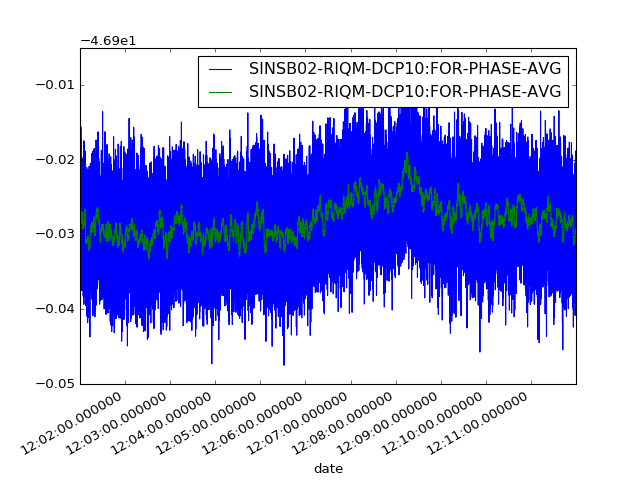

In [10]:
r = df.rolling(window=120)
rm = r.mean()

plt.figure()
df[df.columns[0]].plot()
rm[df.columns[0]].plot()
